<a href="https://colab.research.google.com/github/PedramDbg/CS-MachineLearning/blob/main/Assignment_1/prob2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 2:**

Imagine that you are a realtor in Stillwater. You have data points that correspond to the recent sales
of different houses in and around Stillwater. Your goal is to help estimate the prices of houses that
one can use to sell or buy listings. Can you use your knowledge of linear regression to find the best
regression model? Use your implementation from Question 1 (without any basis functions) to answer
the following questions.
1. What is the average least squares error for the given data using your simple linear regression
model?
2. Which factor has the most effect on the final value? How do you know this? Can you use only
this feature to predict the price?
3. Which factor has the least effect on the final value? How do you know this? What effect does
removing this feature have on the performance?

In [244]:
# inner product and adding the bias
def product(x, theta, b):
    return np.dot(x, theta) + b

def cost_function(X, Y, w, b):
    cost = np.sum(((product(X, w, b) - Y).T@(product(X, w, b) - Y)) / (2*len(Y)))
    return cost

# define weights and baises with gradient descent
def fit_data(X, Y, lr, epochs):
    w = np.zeros(X.shape[1])
    b = 0

    # calculate cost function
    cost_list = []   
    for _ in range(epochs):
        yhat = np.dot(X, w) + b
        loss = yhat - Y
        
        # calculating gradients
        w_gradient = X.T.dot(loss) / len(Y)
        b_gradient = np.sum(loss) / len(Y)
        
        # update weights and biases
        w = w - lr * w_gradient
        b = b - lr * b_gradient

        cost = cost_function(X, Y, w, b)
        cost_list.append(cost)
        
    return w, b, cost_list

In [245]:
# Numpy import
import numpy as np 
# Plotting graphs
import matplotlib.pyplot as plt

# import the data file
from google.colab import drive
drive.mount('/content/drive')
data_path ="/content/drive/My Drive/Machine_Learning/Assignments/assignment_1/Assignment1_Q2_Data.csv"
#data = np.load(data_path, allow_pickle=True)

# we want to query the data in the file
import pandas as pd
import io

# create a data frame
df = pd.read_csv(data_path)
df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type,Architecture type,# Fire places,Price (1000$)
0,1,4.9176,1.0,3.4720,0.998,1.0,7,4,42,3,1,0,25.9
1,2,5.0208,1.0,3.5310,1.500,2.0,7,4,62,1,1,0,29.5
2,3,4.5429,1.0,2.2750,1.175,1.0,6,3,40,2,1,0,27.9
3,4,4.5573,1.0,4.0500,1.232,1.0,6,3,54,4,1,0,25.9
4,5,5.0597,1.0,4.4550,1.121,1.0,6,3,42,3,1,0,29.9
5,6,3.8910,1.0,4.4550,0.988,1.0,6,3,56,2,1,0,29.9
6,7,5.8980,1.0,5.8500,1.240,1.0,7,3,51,2,1,1,30.9
7,8,5.6039,1.0,9.5200,1.501,0.0,6,3,32,1,1,0,28.9
8,9,16.4202,2.5,9.8000,3.420,2.0,10,5,42,2,1,1,84.9
9,10,14.4598,2.5,12.8000,3.000,2.0,9,5,14,4,1,1,82.9


In [246]:
# convert the dataframe into a numpy array
x1= pd.DataFrame(df).to_numpy()
# create feature using columns of the array
x_features = x1[:,1:12]
# create label using the last column of the array
y_label = x1[:,12]
np.shape(x_features)


(28, 11)

In [247]:
# define parameters
lr = 0.003  # learning rate
epochs = 6000


In [248]:
# Fix random seed so that we can reproduce the results
rng = np.random.default_rng(0)
# due to the small size of features, all the rows are taken as training set
train_set_size = 28  

# randomely create some indices in the range of the size of the features
ind = np.random.permutation(x_features.shape[0])    
# pick random indices for training and test sets
train_idx, test_idx = ind[:train_set_size], ind[train_set_size:x_features.shape[0]]
# create training and test sets
xtrain, xtest = x_features[train_idx,:], x_features[test_idx,:]
ytrain, ytest = y_label[train_idx], y_label[test_idx]


In [252]:
# calculate the mean and standard deviation of the training set
Xtrain_mean = np.mean(xtrain, axis=0)
Xtrain_std = np.std(xtrain, axis=0)
# normalize the features existing in the trainig set
xtrain_normal = (xtrain - Xtrain_mean) / Xtrain_std

# calculate the weights and bias using the defined functions
w, b, cost_list = fit_data(xtrain_normal, ytrain, lr, epochs)

Text(0.5, 1.0, 'Cost values vs the number of epochs')

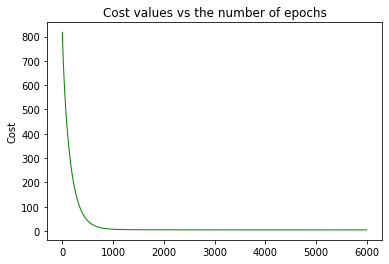

In [251]:
# plot cost values vs epochs
plt.plot(range(epochs), cost_list, 'g', linewidth = "1")
#plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title("Cost values vs the number of epochs")


Answer: 
1) average error is:  25.85478151701999

In [253]:
# calculate average least square error
err_ave = np.average(np.array(cost_list))
print("average error is: ", err_ave)


average error is:  25.85478151701999


In [255]:
# make a prediction using trained model parameters (w and b)
y_pred = product(xtrain, w, b)


In [ ]:
# plot the result of prediction
plt.plot(np.arange(len(ytrain)), ytrain, ".", label="data")
plt.plot(np.arange(len(y_pred)), y_pred, color='y', label="prediction")
#plt.xlabel('Number of Samples')
plt.ylabel('House Price')
plt.title("prediction (11 features)")
plt.legend(loc="upper right")
print(np.shape(w))

Answer: 

2) For knowing that which feature is the most important we first develope models by eliminating one of the features every time. Feature that its abscence results in the greatest error can be nominated as the most effective. 

average error by eliminating Local Pricefrom features is:  26.40457588529958
average error by eliminating Bathroomsfrom features is:  26.76258715913949
average error by eliminating Land Areafrom features is:  25.927897943833123
average error by eliminating Living areafrom features is:  28.1148100891229
average error by eliminating # Garagesfrom features is:  26.089830273852986
average error by eliminating # Roomsfrom features is:  25.8597411582661
average error by eliminating # Bedroomsfrom features is:  25.857434800457835
average error by eliminating Age of homefrom features is:  26.07119790019915
average error by eliminating Construction typefrom features is:  26.42030312754365
average error by eliminating Architecture typefrom features is:  25.958799032869972
average error by eliminating # Fire placesfrom features is:  26.223178021708915
The errors are: [26.40457589 26.76258716 25.92789794 28.11481009 26.08983027 25.85974116
 25.8574348  26.0711979  26.42030313 25.95879903 26.223178

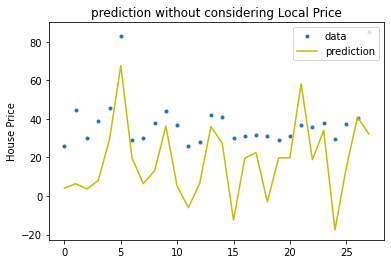

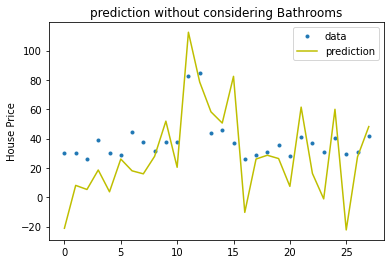

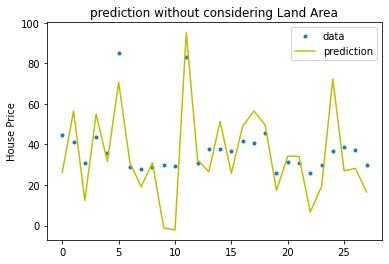

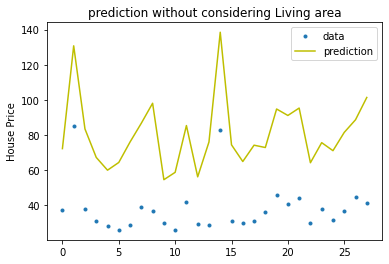

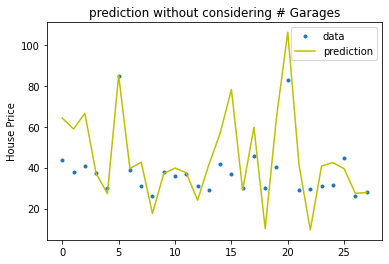

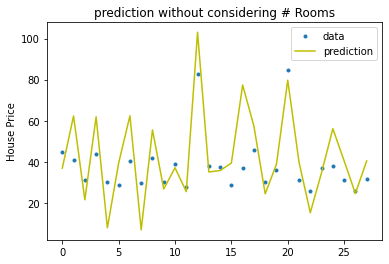

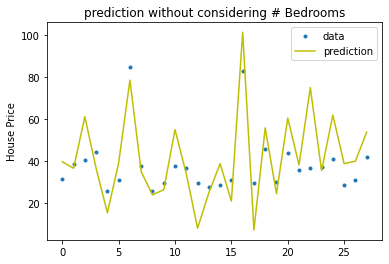

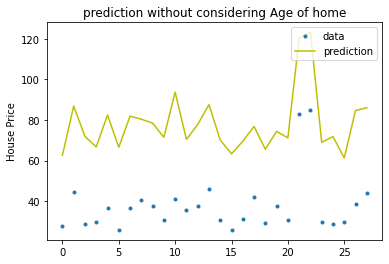

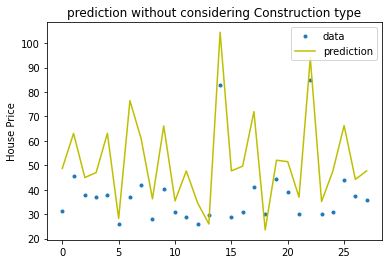

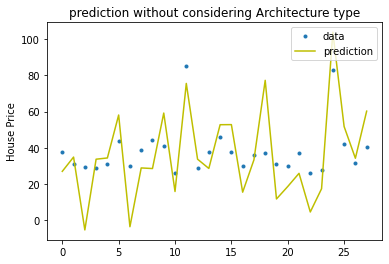

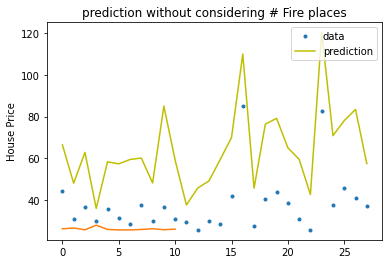

In [259]:
feature_name = ["Local Price", "Bathrooms", "Land Area",\
                "Living area", "# Garages", "# Rooms",\
                "# Bedrooms", "Age of home", "Construction type",\
                "Architecture type", "# Fire places"]

ind_fig=0
cost = []
error_vec = []
for i, feature in enumerate(feature_name):

    x_features = df.drop(["House ID", "Price (1000$)"], axis=1)
    x_features = x_features.to_numpy()
    x_features = np.delete(x_features, i, 1)
    y_label = x1[:,12]

    # Fix random seed so that we can reproduce the results
    rng = np.random.default_rng(0)
    # due to the small size of features, all the rows are taken as training set
    train_set_size = 28  

    # randomely create some indices in the range of the size of the features
    ind = np.random.permutation(x_features.shape[0])    
    # pick random indices for training and test sets
    train_idx, test_idx = ind[:train_set_size], ind[train_set_size:x_features.shape[0]]
    # create training and test sets
    xtrain, xtest = x_features[train_idx,:], x_features[test_idx,:]
    ytrain, ytest = y_label[train_idx], y_label[test_idx]
    test_idx.shape

    # calculate the mean and standard deviation of the training set
    Xtrain_mean = np.mean(xtrain, axis=0)
    Xtrain_std = np.std(xtrain, axis=0)
    # normalize the features existing in the trainig set
    xtrain_normal = (xtrain - Xtrain_mean) / Xtrain_std

    # calculate the weights and bias using the defined functions
    w, b, cost_list = fit_data(xtrain_normal, ytrain, lr, epochs)

    # calculate average least square error
    err_ave = np.average(np.array(cost_list))
    print("average error by eliminating " + str(feature) + "from features is: " , err_ave)
    error_vec = np.append(error_vec, err_ave)

    # make a prediction using trained model parameters (w and b)
    y_pred = product(xtrain, w, b)

    # plot the result of prediction
    plt.figure(ind_fig)
    plt.plot(np.arange(len(ytrain)), ytrain, ".", label="data")
    plt.plot(np.arange(len(y_pred)), y_pred, color='y', label="prediction")
    #plt.xlabel('Number of Samples')
    plt.ylabel('House Price')
    plt.title("prediction without considering "+ str(feature))
    plt.legend(loc="upper right")
    ind_fig += 1

print("The errors are: " + str(error_vec))
plt.plot(np.arange(len(error_vec)), error_vec)

ind_max = int(np.where(error_vec == np.max(error_vec))[0])
print('The minimum error is: ' +  str(np.max(error_vec)) + ' which happens when feature ' + feature_name[ind_min] + ' is eliminated' )



We can see that there are not much differences among the errors. Therefore we are going to consider the features one by one and compare the resultant errors.

Answer: 

3) For knowing that which feature is the most important we can also develope models by considering only one of the features every time. Feature the least error can be nominated as the most effective in this case. 

average error by eliminating Local Pricefrom features is:  36.689615587188506
average error by eliminating Bathroomsfrom features is:  36.353685796477464
average error by eliminating Land Areafrom features is:  75.01205890613029
average error by eliminating Living areafrom features is:  36.94889305266406
average error by eliminating # Garagesfrom features is:  96.7311891246719
average error by eliminating # Roomsfrom features is:  60.013898533282024
average error by eliminating # Bedroomsfrom features is:  70.64739985603484
average error by eliminating Age of homefrom features is:  108.34268341477957
average error by eliminating Construction typefrom features is:  113.95640211060102
average error by eliminating Architecture typefrom features is:  116.71245550907314
average error by eliminating # Fire placesfrom features is:  94.19543141202904
The minimum error is: 36.353685796477464 which happens when feature Bathrooms is selected


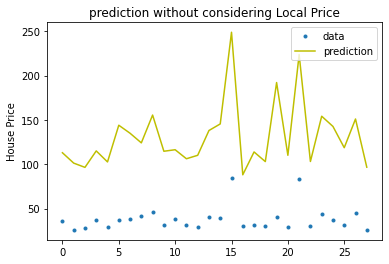

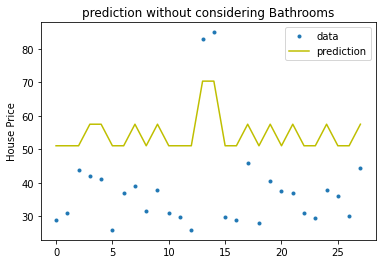

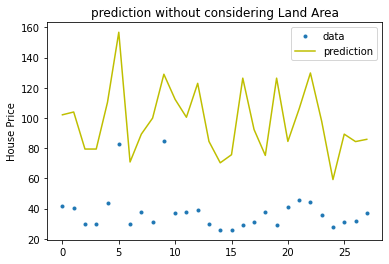

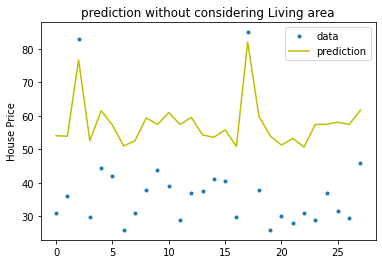

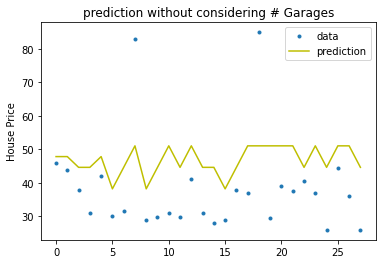

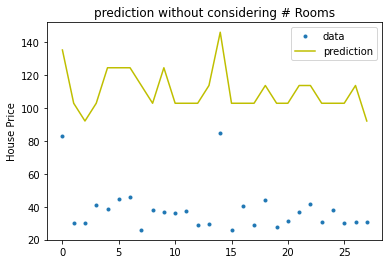

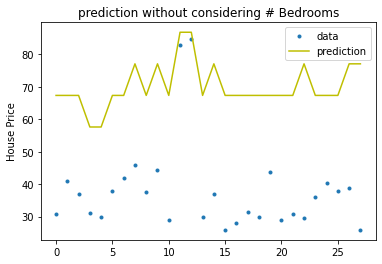

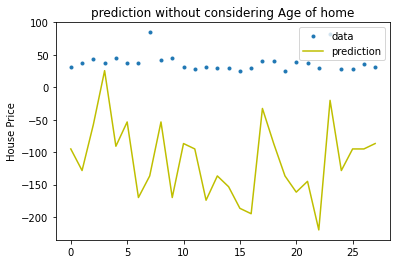

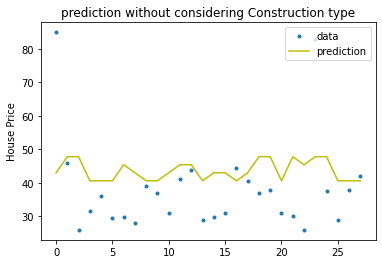

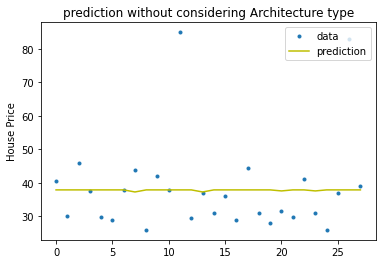

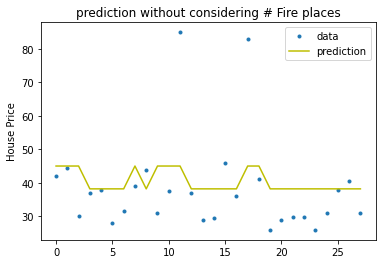

In [260]:
ind_fig=0
ave_err_vec = []
error_vec = []
for i, feature in enumerate(feature_name):

    x_features = df.drop(["House ID", "Price (1000$)"], axis=1)
    x_features = x_features.to_numpy()
    x_features = x_features[:,i]
    y_label = x1[:,12]

    # Fix random seed so that we can reproduce the results
    rng = np.random.default_rng(0)
    # due to the small size of features, all the rows are taken as training set
    train_set_size = len(x_features)  

    # randomely create some indices in the range of the size of the features
    ind = np.random.permutation(x_features.shape[0])    
    # pick random indices for training and test sets
    train_idx = ind[:train_set_size]
    # create training and test sets
    xtrain = x_features[train_idx]
    ytrain = y_label[train_idx]

    # calculate the mean and standard deviation of the training set
    Xtrain_mean = np.mean(xtrain, axis=0)
    Xtrain_std = np.std(xtrain, axis=0)
    # normalize the features existing in the trainig set
    xtrain_normal = (xtrain - Xtrain_mean) / Xtrain_std
    xtrain_normal = xtrain_normal.reshape(-1,1)

    # calculate the weights and bias using the defined functions
    w, b, cost_list = fit_data(xtrain_normal, ytrain, lr, epochs)

    # calculate average least square error
    err_ave = np.average(np.array(cost_list))
    print("average error by eliminating " + str(feature) + "from features is: " , err_ave)
    error_vec = np.append(error_vec, err_ave)
    w = w.reshape(-1,1)
    xtrain = xtrain.reshape(-1,1)
 
    # make a prediction using trained model parameters (w and b)
    y_pred = product(xtrain, w, b)

    # plot the result of prediction
    plt.figure(ind_fig)
    plt.plot(np.arange(len(ytrain)), ytrain, ".", label="data")
    plt.plot(np.arange(len(y_pred)), y_pred, color='y', label="prediction")
    #plt.xlabel('Number of Samples')
    plt.ylabel('House Price')
    plt.title("prediction without considering "+ str(feature))
    plt.legend(loc="upper right")
    ind_fig += 1
    ave_err_vec = np.append(ave_err_vec, err_ave)

ind_min = int(np.where(ave_err_vec == np.min(ave_err_vec))[0])
print('The minimum error is: ' +  str(np.min(ave_err_vec)) + ' which happens when feature ' + feature_name[ind_min] + ' is selected' )


Answer 2,3) According to the two presented method of choosing features (by eliminating and considering just one feature every time), we can conclude that the "# Bathroom" is the most effective among all features.